In [1]:
import autorootcwd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from skrebate import ReliefF

from src.data import artificial, spam
from src.evaluation import evaluate, search_knn, search_rf, search_xgboost

In [2]:
X_a, y_a = artificial.prepare_data()
X_spam, y_spam = spam.prepare_data()

In [3]:
c_s = [i for i in range(4, 51, 3)]

scores_knn = []
scores_rf = []
scoeres_xgb = []
features = []
params_knn_a = []
params_rf_a = []
params_xgb_a = []
features = []
n_features = []

In [4]:
relief = ReliefF(n_neighbors=100, verbose=True)
relief.fit(X_a.astype('float64'), y_a.astype('float64'))
feature_importances = relief.feature_importances_

for c in c_s:
    print(f"_____ C={c} _____")
    selected_feature_indices = np.argsort(feature_importances)[::-1][:c]
    X_selected = X_a[:, selected_feature_indices]
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_a, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_a, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_a, num_folds=10)

    scores = evaluate(X_selected, y_a, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.2)

    scores_knn.append(scores['KNN'][1])
    scores_rf.append(scores['RF'][1])
    scoeres_xgb.append(scores['XGB'][1])
    params_knn_a.append(params_knn)
    params_rf_a.append(params_rf)
    params_xgb_a.append(params_xgb)
    n_features.append(num_features)
    features.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

Created distance array in 3.8250010013580322 seconds.
Feature scoring under way ...
Completed scoring in 419.6192350387573 seconds.
_____ C=4 _____
4 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.6900000000000001 | RF 0.683 | XGB 0.6835
_____ C=7 _____
7 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.7689999999999999 | RF 0.76 | XGB 0.7489999999999999
_____ C=10 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8450000000000001 | RF 0.842 | XGB 0.8219999999999998
_____ C=13 _____
13 features selected
F

In [5]:
df = pd.DataFrame(data=np.array([n_features, scores_knn, scores_rf, scoeres_xgb]).transpose(), columns=["features", "knn", "rf", "xgb"])

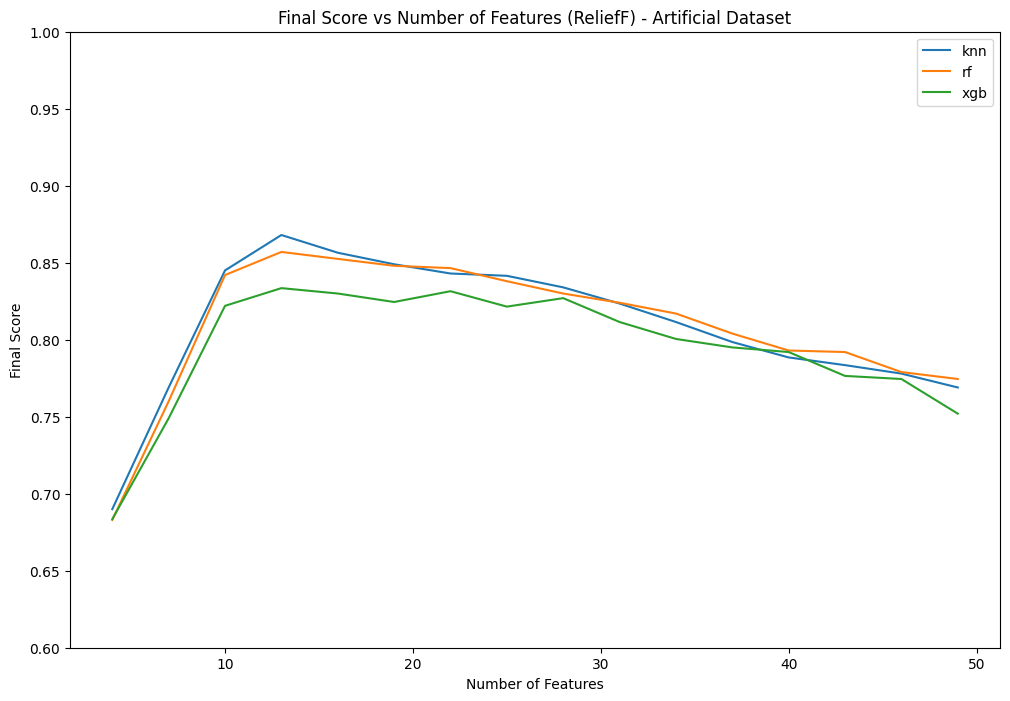

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (ReliefF) - Artificial Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("artificial_relieff.png")
plt.show()

In [7]:
c_s = [i for i in range(5, 101, 5)]

scores_knn_spam = []
scores_rf_spam = []
scoeres_xgb_spam = []
params_knn_spam = []
params_rf_spam = []
params_xgb_spam = []
features_spam = []
n_features_spam = []

In [8]:
relief = ReliefF(n_neighbors=10, verbose=True)
relief.fit(X_spam.astype('float64'), y_spam.astype('float64'))
feature_importances = relief.feature_importances_

Created distance array in 79.67888951301575 seconds.
Feature scoring under way ...
Completed scoring in 1035.9263145923615 seconds.


In [9]:
for c in c_s:
    print(f"_____ C={c} _____")
    selected_feature_indices = np.argsort(feature_importances)[::-1][:c]
    X_selected = X_spam[:, selected_feature_indices]
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_spam, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_spam, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_spam, num_folds=10)

    scores = evaluate(X_selected, y_spam, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.01)

    scores_knn_spam.append(scores['KNN'][1])
    scores_rf_spam.append(scores['RF'][1])
    scoeres_xgb_spam.append(scores['XGB'][1])
    params_knn_spam.append(params_knn)
    params_rf_spam.append(params_rf)
    params_xgb_spam.append(params_xgb)
    n_features_spam.append(num_features)
    features_spam.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=5 _____
5 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.6553226243923819 | RF 0.6231183114844027 | XGB 0.6191462134549276
_____ C=10 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.6950334614849674 | RF 0.6818618048967271 | XGB 0.6970600592541566
_____ C=15 _____
15 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.6906614137546535 | RF 0.684447169247178 | XGB 0.6933465143641326
_____ C=20 _____
20 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds 

In [10]:
df = pd.DataFrame(data=np.array([n_features_spam, scores_knn_spam, scores_rf_spam, scoeres_xgb_spam]).transpose(), columns=["features", "knn", "rf", "xgb"])

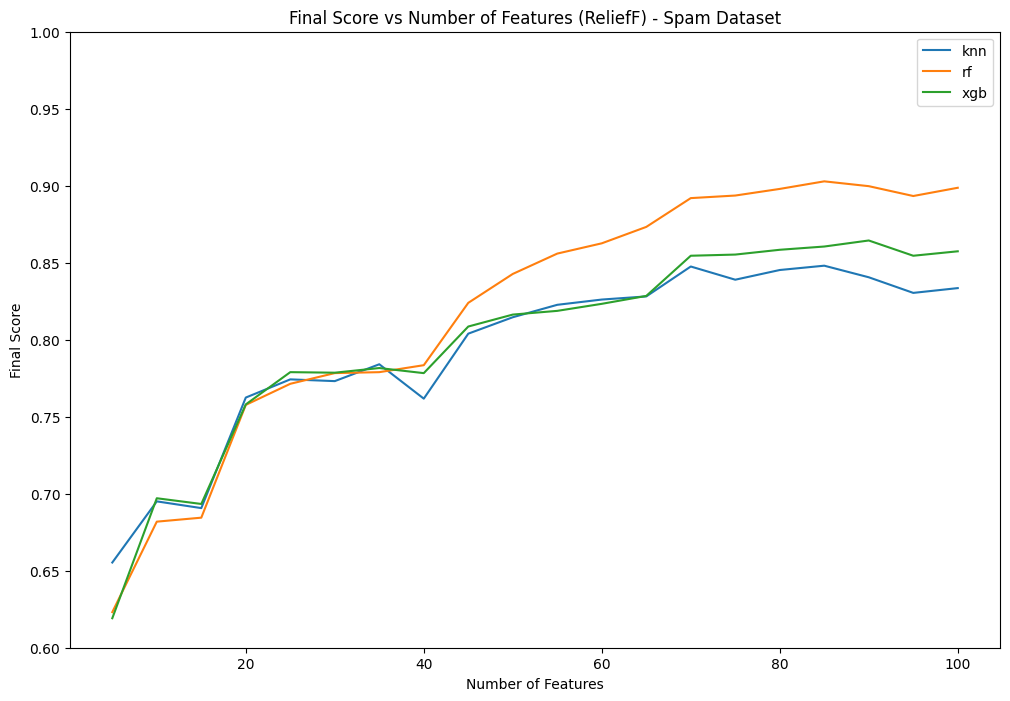

In [11]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (ReliefF) - Spam Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("spam_relieff.png")
plt.show()

### Artificial analysis

In [22]:
print(np.array(scores_knn).max())
print(np.array(scores_knn).argmax())

0.868
3


In [24]:
print(scores_knn[3])
print(params_knn_a[3])

0.868
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [25]:
print(features[3])

[241 475 338  64 336 128 105 378  48 472 442 493 453]


In [26]:
print(n_features[3])

13


### Spam analysis

In [16]:
print(np.array(scores_rf_spam).max())
print(np.array(scores_rf_spam).argmax())

0.9028430744938085
16


In [17]:

print(scores_rf_spam[16])
print(params_rf_spam[16])

0.9028430744938085
{'n_estimators': 300}


In [18]:
print(features_spam[16])

[1632 4857  703 3473 3082 4303 5357 5845 5723 3431 4548 5920  678  296
  462  279 5919 7483 3047  684 6171  255 7120 2220 3053   42  551 2853
   17 3054  266 7822 2058  204 1360 1488 1626  115 4945  264  631 7093
  149 7872   99  146  123  148 4500 7524 3712 1655 7877 1060 2908 6653
 3209 5535 4340 3330 1700 5076 4758 6973 3005 7691  256 3821 6943  535
 4252 7776 3833 4296  969 4993 1130 6969 4113 3590 4932 5706 7019  834
 7416]


In [19]:
print(n_features_spam[16])

85


### Results

In [27]:
data_ = [
    {"dataset_name": "artificial", "feature_selection_method": "relieff", "classifier":"KNN", "best_num_features": 13, "best_score": 0.868},
    {"dataset_name": "spam", "feature_selection_method": "relieff", "classifier":"RF", "best_num_features": 85, "best_score": 0.9028430744938085}
]

df_ = pd.DataFrame(data_, columns=["dataset_name", "feature_selection_method", "classifier", "best_num_features", "best_score"])
df_.to_csv("results/relieff_results.csv", index=False)